<a href="https://colab.research.google.com/github/abdelhadi-12/Machine-Learning-/blob/main/Diamond_Price_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving diamonds.csv to diamonds.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
data = pd.read_csv("diamonds.csv")


In [ ]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.shape

(53940, 11)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# La première colonne semble être uniquement un index.

> Ajouter une citation



In [ ]:
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#Suppression des diamants sans dimension.

In [ ]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

# 1. Suppression des valeurs aberrantes où les dimensions x, y ou z sont nulles.
# 2. Entraînement d’un modèle de régression linéaire avec 'y' comme variable explicative et 'price' comme variable cible.
# 3. Génération et affichage d’un graphique :
#    - Nuage de points des données réelles avec axes inversés (prix en abscisse, 'y' en ordonnée).
#    - Droite de régression affichée en rouge pour illustrer la tendance.
# Le graphique permet d’observer visuellement l’influence de la hauteur 'y' sur le prix d’un diamant.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


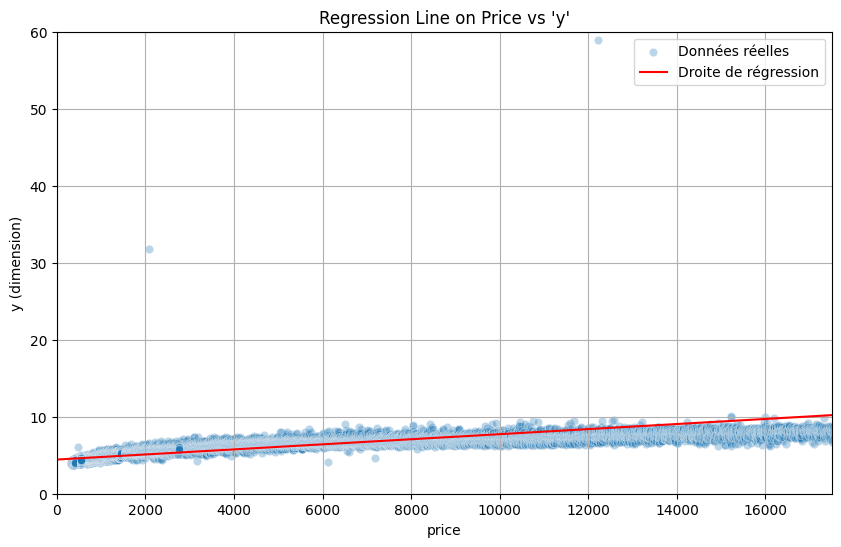

In [ ]:
# Supprimer les diamants sans dimension
data = data.drop(data[data["x"] == 0].index)
data = data.drop(data[data["y"] == 0].index)
data = data.drop(data[data["z"] == 0].index)

# Définir le modèle de régression linéaire
model = LinearRegression()

# Ajuster le modèle sur les données (y comme variable indépendante, price comme variable dépendante)
model.fit(data[["y"]], data["price"])

# Générer les prédictions pour la droite de régression
x_range = np.linspace(data["y"].min(), data["y"].max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# Tracer le graphique (axes inversés)
plt.figure(figsize=(10, 6))
sns.scatterplot(y="y", x="price", data=data, alpha=0.3, label="Données réelles")  # Inversé ici
plt.plot(y_pred, x_range, color='red', label='Droite de régression')  # Droite inversée aussi

# Ajouter un titre et ajuster les axes
plt.title("Regression Line on Price vs 'y'")
plt.ylabel("y (dimension)")  # Label vertical
plt.xlabel("price")  # Label horizontal

# Définir les limites des axes (les axes sont inversés)
plt.xlim(0, 17500)  # Limiter l'axe x (price) entre 0 et 17500
plt.ylim(0, 60)  # Limiter l'axe y (dimension) entre 0 et 60

# Ajouter une légende et une grille
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

# Même logique que le code précédent, mais cette fois on utilise la dimension 'z' au lieu de 'y' pour prédire le prix.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


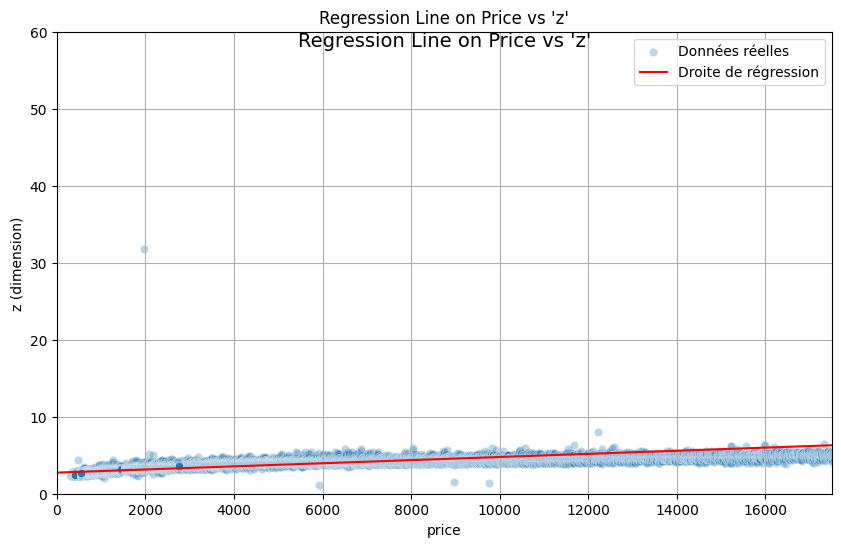

In [ ]:
data = data.drop(data[data["x"] == 0].index)
data = data.drop(data[data["y"] == 0].index)
data = data.drop(data[data["z"] == 0].index)

# Définir le modèle de régression linéaire
model = LinearRegression()

# Ajuster le modèle sur les données (z comme variable indépendante, price comme variable dépendante)
model.fit(data[["z"]], data["price"])

# Générer les prédictions pour la droite de régression
x_range = np.linspace(data["z"].min(), data["z"].max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# Tracer le graphique (axes inversés)
plt.figure(figsize=(10, 6))
sns.scatterplot(y="z", x="price", data=data, alpha=0.3, label="Données réelles")  # Inversé ici
plt.plot(y_pred, x_range, color='red', label='Droite de régression')  # Droite inversée aussi

# Ajouter un titre et ajuster les axes
plt.title("Regression Line on Price vs 'z'")
plt.ylabel("z (dimension)")  # Label vertical
plt.xlabel("price")  # Label horizontal

# Ajouter le texte à la position (0.5, 1.0)
plt.text(0.5, 1.0, "Regression Line on Price vs 'z'", transform=plt.gca().transAxes, ha="center", va="top", fontsize=14)

# Définir les limites des axes (les axes sont inversés)
plt.xlim(0, 17500)  # Limiter l'axe x (price) entre 0 et 17500
plt.ylim(0, 60)  # Limiter l'axe y (dimension) entre 0 et 60

# Ajouter une légende et une grille
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

# Même approche que précédemment, mais cette fois la variable 'table' (%) est utilisée pour prédire le prix des diamants.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


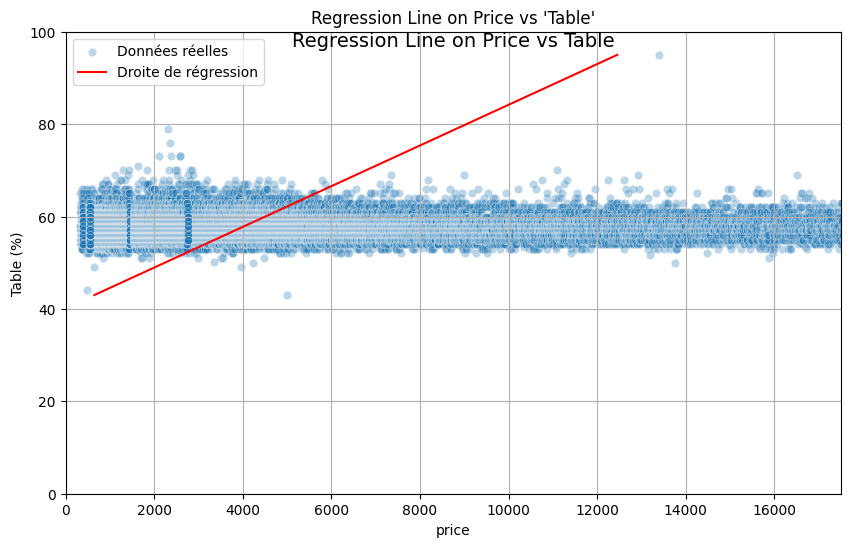

In [ ]:
data = data.drop(data[data["x"] == 0].index)
data = data.drop(data[data["y"] == 0].index)
data = data.drop(data[data["z"] == 0].index)

# Définir le modèle de régression linéaire
model = LinearRegression()

# Ajuster le modèle sur les données (table comme variable indépendante, price comme variable dépendante)
model.fit(data[["table"]], data["price"])

# Générer les prédictions pour la droite de régression
x_range = np.linspace(data["table"].min(), data["table"].max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# Tracer le graphique (axes inversés)
plt.figure(figsize=(10, 6))
sns.scatterplot(y="table", x="price", data=data, alpha=0.3, label="Données réelles")  # Inversé ici
plt.plot(y_pred, x_range, color='red', label='Droite de régression')  # Droite inversée aussi

# Ajouter un titre et ajuster les axes
plt.title("Regression Line on Price vs 'Table'")
plt.ylabel("Table (%)")  # Label vertical
plt.xlabel("price")  # Label horizontal

# Ajouter le texte à la position (0.5, 1.0)
plt.text(0.5, 1.0, "Regression Line on Price vs Table", transform=plt.gca().transAxes, ha="center", va="top", fontsize=14)

# Définir les limites des axes (les axes sont inversés)
plt.xlim(0, 17500)  # Limiter l'axe x (price) entre 0 et 17500
plt.ylim(0, 100)  # Limiter l'axe y (table) entre 0 et 100

# Ajouter une légende et une grille
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

# Suppression des valeurs aberrantes.

In [ ]:
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape


(53907, 10)

# On peut clairement observer des valeurs aberrantes dans ces attributs.
# On va maintenant les supprimer, puis visualiser les relations entre les variables restantes avec un pair plot.


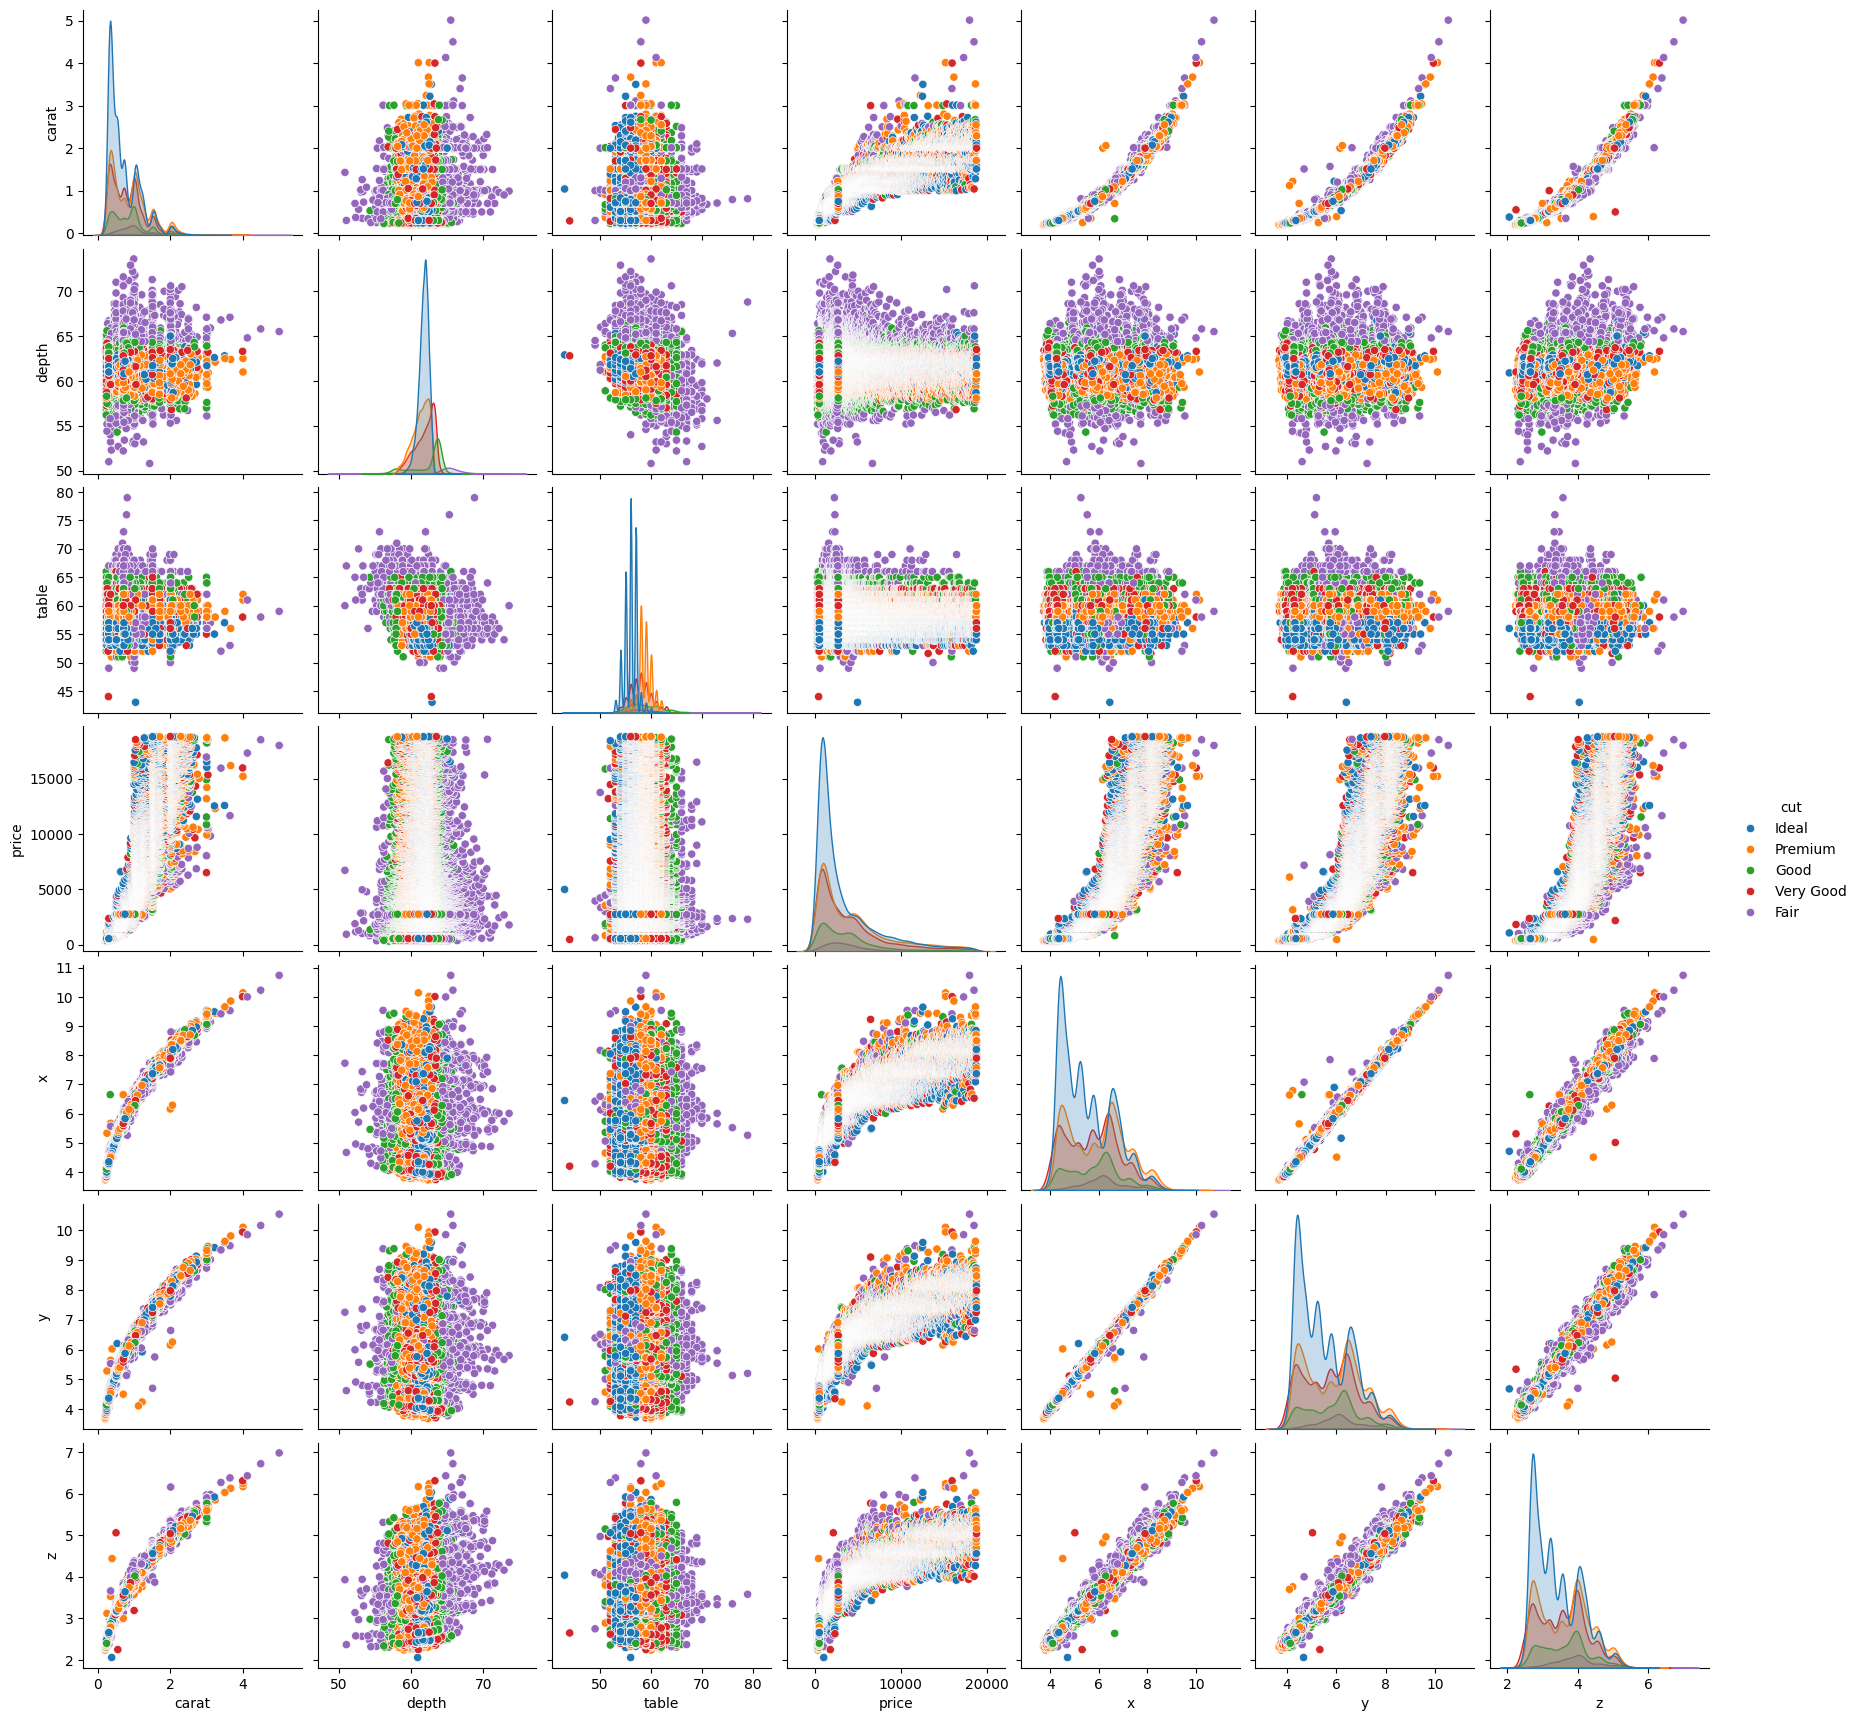

In [ ]:
ax = sns.pairplot(data, hue="cut")

# Obtenir la liste des variables catégorielles





In [ ]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


# Pour chaque colonne catégorique, afficher les catégories présentes et leur fréquence dans les données.
# Cela nous aide à mieux comprendre la répartition des valeurs dans chaque attribut catégorique.


In [ ]:
for col in object_cols:
    print(f"\nCategories in '{col}':")
    print(data[col].value_counts())


Categories in 'cut':
cut
Ideal        21543
Premium      13779
Very Good    12080
Good          4902
Fair          1603
Name: count, dtype: int64

Categories in 'color':
color
G    11282
E     9792
F     9536
H     8296
D     6774
I     5420
J     2807
Name: count, dtype: int64

Categories in 'clarity':
clarity
SI1     13059
VS2     12250
SI2      9184
VS1      8167
VVS2     5066
VVS1     3654
IF       1790
I1        737
Name: count, dtype: int64


# Pour chaque colonne catégorique, tracer un graphique à barres montrant la distribution des catégories.
# La taille de la figure est ajustée pour améliorer la lisibilité, et les labels des catégories sont tournés si nécessaire.
# Ce graphique aide à visualiser la fréquence de chaque catégorie dans les colonnes catégorielles.


<ipython-input-48-f1b505b65581>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="Set2")  # Graphique à barres avec seaborn


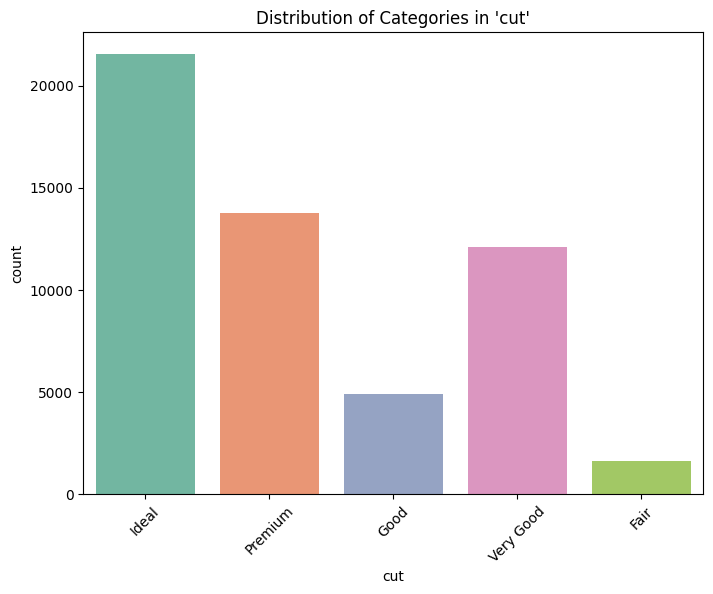

<ipython-input-48-f1b505b65581>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="Set2")  # Graphique à barres avec seaborn


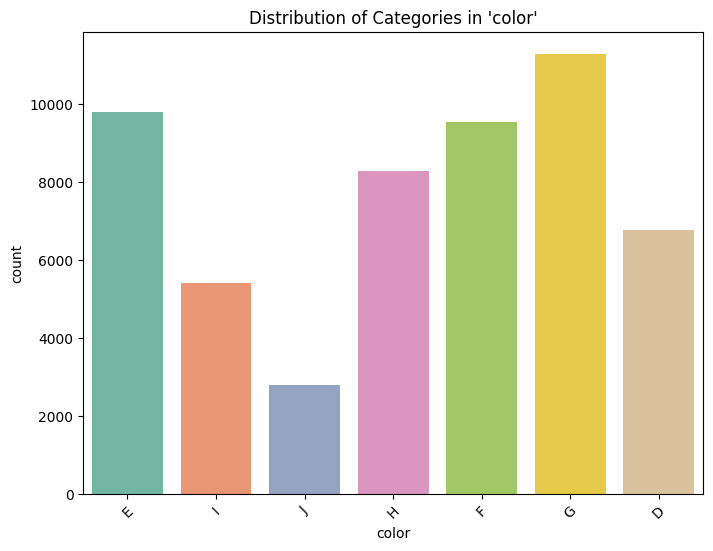

<ipython-input-48-f1b505b65581>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette="Set2")  # Graphique à barres avec seaborn


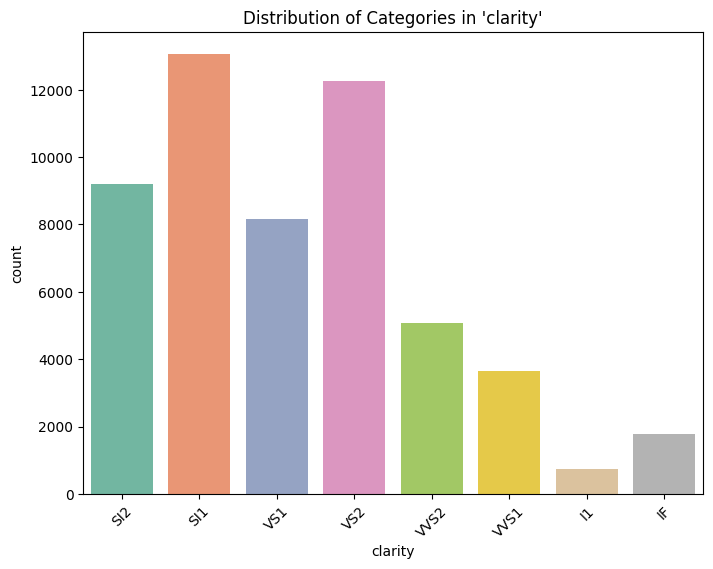

In [ ]:
for col in object_cols:
    plt.figure(figsize=(8, 6))  # Définir la taille de la figure
    sns.countplot(x=col, data=data, palette="Set2")  # Graphique à barres avec seaborn
    plt.title(f"Distribution of Categories in '{col}'")
    plt.xticks(rotation=45)  # Faire pivoter les labels des catégories si nécessaire
    plt.show()

#Faire une copie pour éviter de modifier les données originales
# Appliquer l'encodeur de labels à chaque colonne contenant des données catégorielles.

In [ ]:
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


# Afficher un résumé statistique des colonnes numériques du jeu de données,
# incluant la moyenne, l'écart-type, les valeurs minimales et maximales,
# ainsi que les quartiles. Cela permet d'obtenir une vue d'ensemble rapide des distributions de données numériques.


In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


#Matrice de corrélation.

<Axes: >

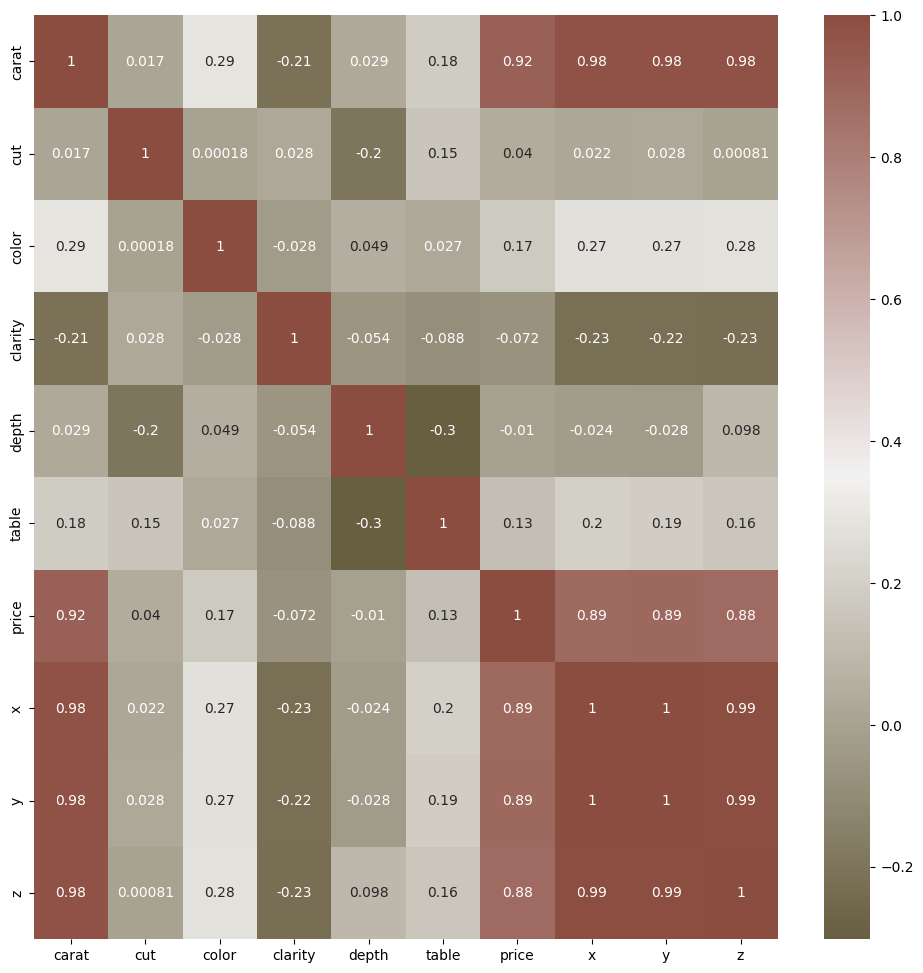

In [ ]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

# Assigner les caractéristiques à X et la cible à y.

In [ ]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

# Construction d'un pipeline avec le standard scaler et le modèle pour divers régressseurs

In [ ]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTree: -755.498554 
RandomForest: -546.530181 
KNeighbors: -823.648809 
XGBRegressor: -547.645093 


# Prédiction du modèle sur les données de test.

In [ ]:
pred = pipeline_xgb.predict(X_test)

# Évaluation du modèle.

In [ ]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9803842902183533
Adjusted R^2: 0.9803711810338256
MAE: 280.17333984375
MSE: 307728.1875
RMSE: 554.7325369040472
